<a href="https://colab.research.google.com/github/malphons/Project_Columbia_HFBootcamp/blob/main/Class_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generalized Additive Models (GAM)

- We ONLY focus on nonlinearity for a single predicator at a time. How do we assess the nonlinearity in **multiple predictors**?

- For multiple linear regression model, we have

$$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_px_{ip}+\epsilon_i$$

- In a generalized additive model (GAM), we replace all the linear terms with arbitrary functions $f_j$:

$$y_i=\beta_0+f_1(x_{i1})+f_2(x_{i2})+...+f_p(x_{ip})+\epsilon_i$$
e.g., $$y_i=\beta_0+\beta_1log(x_{i1})+\beta_2sqrt(x_{i2})+\beta_3log(x_{i3})+\epsilon_i$$

- **How do we (do we even need to) guess the exact forms (e.g., log, sqrt) for the $f_j$'s?**
- We actually don't need to pre-specify!
- We can use smoothly connected piecewise cubic polynomials for the $f_j$ or smooth functions constructed via some process (e.g., local regression)
- More specifically, we will be using **backfitting**: iterative "guess and update" procedure. E.g., to update $f_1$:
 - Form partial residual: $r_i=y_i-\hat{f_2}(x_{i2})-...-\hat{f_p}(x_{ip})$
 - Local regression of partial residuals vs. $x_1$: estimate for $f_1$
 - Repeat this process for the other functions & repeat the overall process several time until convergence.

- For example:

$$wage=\beta_0+f_1(year)+f_2(age)+f_3(education)+\epsilon_i$$

- The first two functions are splines in year and age, with four and five degrees of freedom, respectively. The third function is a step function, fit to the qualitative variable education.

<div>
<img src="https://drive.google.com/uc?export=view&id=1M1dwY2sJbnkzwfh-w_rwu9xnqCGl28GJ" width="900" height="400" />

- GAM is not included in the standard sklearn package but there is one specific implementation on Github that we can use. Check out the repo [here](https://github.com/dswah/pyGAM).

In [ ]:
!pip -q uninstall -y numpy
!pip -q install numpy==1.24.2 pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 22.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.24.2 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.24.2 which is incompatible.


In [ ]:
from pygam.datasets import wage
from pygam import LinearGAM, s, f

X, y = wage()
gam = LinearGAM(s(0) + s(1) + f(2)).fit(X, y)

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

<ipython-input-3-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


## Decision Tree

- Decision Tree algorithm can be used for both regression and classification problems.
- In scikit-learn, they are called **Decision Tree Classifier** and **Decision Tree Regressor** respectively.
- Let's use the classic iris dataset as an example of classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal length (cm) <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal length (cm) <= 6.5\ngini = 

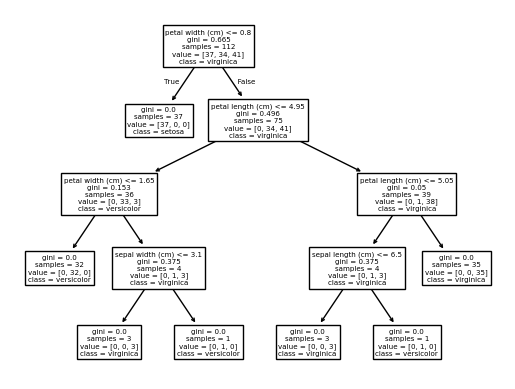

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Specific class and feature name representation
class_names = iris['target_names']
feature_names = iris['feature_names']

# Symbolic class name representation
tree.plot_tree(clf, class_names=class_names, feature_names=feature_names)

In [ ]:
X_train

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

### Gini Index

- Gini impurity is a measure of node purity. When we are using gini impurity as the metric for splitting, our goal is to have two subregions as pure as possible by reducing the weighted sum of gini impurities.
- Gini Impurity: $I_G(f) = \sum_{i=1}^m f_i(1-f_i)$ where $f_i$ is the fraction of items labeled with $i$ in the set and $\sum f_i = 1$.
- What is the maximum and minimum value of Gini Index and under what circumstances?

In [ ]:
def gini(prob):
    return sum([x*(1-x) for x in prob])

In [ ]:
gini([1/2, 1/2])

0.5

In [ ]:
gini([9/10, 1/10])

0.18

In [ ]:
gini([1.0, 0.0])

0.0

In [ ]:
gini([1/3, 1/3, 1/3])

0.6666666666666667

In [ ]:
n=100
gini([1/n for _ in range(n)])

0.9900000000000014

### Feature Importance

- One bonus of decision trees and its derivatives (random forests, boosting trees) is its output of feature importance as percentage scores
- For each feature, the tree outputs a score in percentage (i.e. between 0 and 1), with properties:
 - The total sum of all the feature scores is 1
 - The higher the score, more important the feature is
- The score can be interpreted as the percentage of contribution of the particular feature to the given tree model's success.
- If a given feature never appears as the node-splitting feature in the given tree, its importance score is zero

In [ ]:
clf.feature_importances_

array([0.02014872, 0.02014872, 0.40530263, 0.55439994])

In [ ]:
sum(clf.feature_importances_)

1.0

### Categorical Features

- We learned that we need to dummify the categorical features in dealing with multiple linear regression. Dummification produces a lot of new binary features, which exhausts computation resource.
- For tree-based models, the dummification is often **not** necessary, unless the number of possible categorical values is huge.
- We only need to relabel the categorical values by integers.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [ ]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [ ]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])